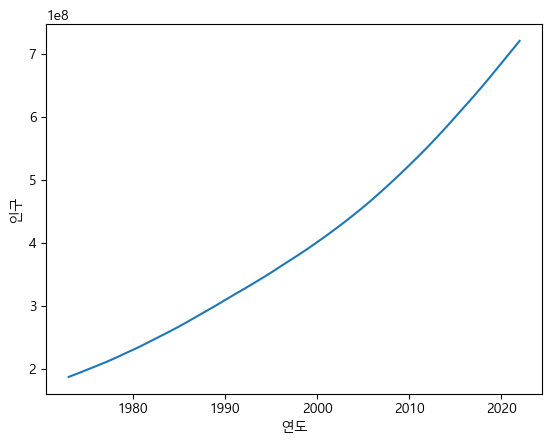

In [4]:
import requests
import json
import matplotlib.pyplot as plt
import smtplib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 글꼴 경로 설정 (실제 사용하는 글꼴 경로로 수정 필요)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 한글 글꼴 설정
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 데이터 수집
api_url = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json"
response = requests.get(api_url)
data = response.json()

# 데이터 가공 (예시로, 최신 연도의 인구 데이터 추출)
# API 응답 구조를 확인하고 적절한 데이터 추출 방법을 사용해야 합니다.
# 아래 예시는 API 응답 구조에 맞게 수정된 코드입니다.
data_list = [item for item in data[1] if item['value'] is not None]

# 전처리 작업 수행 (예시로, 평균 계산)
population_values = [float(item['value']) for item in data_list]
mean_population = sum(population_values) / len(population_values)

# 시각화
years = [int(item['date']) for item in data_list]
plt.plot(years, population_values)
plt.xlabel('연도')
plt.ylabel('인구')
plt.savefig("world_bank_population_graph.png")

# 리포트 생성
report = "평균 인구: {:.2f}".format(mean_population)
with open("world_bank_analysis_report.txt", "w") as f:
    f.write(report)

# 모니터링 및 알림
if mean_population > 7500000000:  # 예시 임계값
    # 이메일 알림
    smtp_server = "your_smtp_server.com"
    sender_email = "your_email@example.com"
    receiver_email = "receiver@example.com"
    password = "your_password"

    message = "세계 평균 인구가 임계값을 넘었습니다!"
    server = smtplib.SMTP(smtp_server, 587)
    server.starttls()
    server.login(sender_email, password)
    server.sendmail(sender_email, receiver_email, message)
    server.quit()


In [5]:
import pandas as pd

# 간단한 예제 데이터 생성
data = {'날짜': ['2023-01-01', '2023-01-02', '2023-01-03'],
        '제품': ['제품A', '제품B', '제품A'],
        '판매량': [100, 200, 150],
        '가격': [10, 15, 10]}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 데이터프레임을 엑셀 파일로 저장
excel_file = 'sales_data.xlsx'
df.to_excel(excel_file, index=False)


In [6]:
import pandas as pd
import openpyxl
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime

# 엑셀 파일 로드
excel_file = 'sales_data.xlsx'
df = pd.read_excel(excel_file)

# 데이터 처리 (예: 매출 계산)
df['매출'] = df['판매량'] * df['가격']

# 보고서 생성
report_file = 'sales_report.xlsx'
wb = Workbook()
ws = wb.active
ws.title = "Sales Report"
for r_idx, row in enumerate(dataframe_to_rows(df, index=False, header=True), 1):
    for c_idx, value in enumerate(row, 1):
        cell = ws.cell(row=r_idx, column=c_idx, value=value)

# 보고서 파일 저장 (파일 이름에 현재 날짜와 시간 추가)
report_file = 'sales_report_' + datetime.now().strftime("%Y%m%d_%H%M%S") + '.xlsx'
wb.save(report_file)


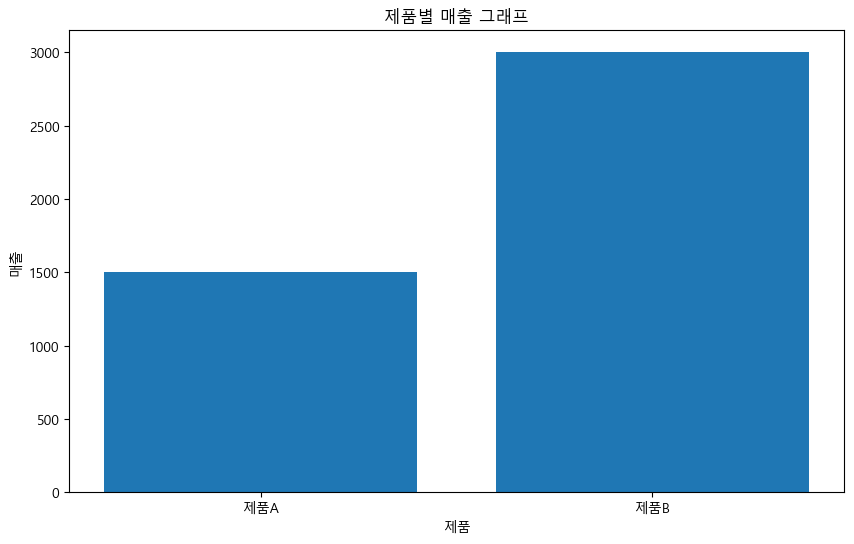

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime

# 엑셀 파일 로드
excel_file = 'sales_data.xlsx'
df = pd.read_excel(excel_file)

# 데이터 처리 (예: 매출 계산)
df['매출'] = df['판매량'] * df['가격']

# 보고서 생성
report_file = 'sales_report.xlsx'
wb = Workbook()
ws = wb.active
ws.title = "Sales Report"
for r_idx, row in enumerate(dataframe_to_rows(df, index=False, header=True), 1):
    for c_idx, value in enumerate(row, 1):
        cell = ws.cell(row=r_idx, column=c_idx, value=value)

# 보고서 파일 저장 (파일 이름에 현재 날짜와 시간 추가)
report_file = 'sales_report_' + datetime.now().strftime("%Y%m%d_%H%M%S") + '.xlsx'
wb.save(report_file)

# 제품별 매출 막대 그래프 생성
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(df['제품'], df['매출'])
plt.xlabel('제품')
plt.ylabel('매출')
plt.title('제품별 매출 그래프')
plt.show()  # 그래프 표시
